In [1]:
import sympy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = sp.symbols('x')
f = sp.sin(x) / sp.sqrt(1 - x)
start, end = 0, 1

In [3]:
f

sin(x)/sqrt(1 - x)

We will be integrating the following function from 0 to 1

# Let's plot it first!

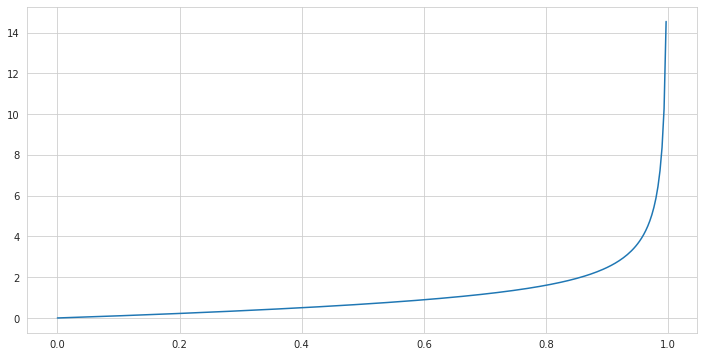

In [4]:
x_plot = np.linspace(start, end, 300, endpoint=False)
y_plot = sp.lambdify(x, f, 'numpy')(x_plot)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x_plot, y_plot);

# Exact value

In [5]:
true_value = 1.18698444
# Thanks, Wolfram Alpha!

# Midpoint Riemann sum

In [6]:
nodes_count = 3
nodes = np.linspace(start, end, nodes_count, endpoint=False)
step = (nodes[1] - nodes[0])
nodes += step / 2

values = sp.lambdify(x, f, 'numpy')(nodes)
mid_riemann_value = step * values.sum()

In [7]:
mid_riemann_value

0.8909319389164732

# Using weights

In [8]:
p = 1 / sp.sqrt(1 - x)
nodes = [sp.Rational(1, 6), 0.5, sp.Rational(5, 6)]
phi = f / p
w = (x - nodes[0]) * (x - nodes[1]) * (x - nodes[2])
dw = w.diff()

In [9]:
coeffs = [
    11 / 20,
    -1 / 10,
    31 / 20
]
coeffs

[0.55, -0.1, 1.55]

In [10]:
weights_value = sum([coeffs[i] * phi.evalf(subs={x: nodes[i]}) for i in range(len(nodes))])
weights_value

1.19057444157482

# Gauss time!
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Carl_Friedrich_Gauss_1840_by_Jensen.jpg/1200px-Carl_Friedrich_Gauss_1840_by_Jensen.jpg)

In [11]:
roots = [-1 / sp.sqrt(3), 1 / sp.sqrt(3)]
coeffs = [1, 1]
nodes = [(start + end + (end - start) * r) / 2 for r in roots]

In [12]:
gauss_value = sum([coeffs[i] * f.evalf(subs={x: nodes[i]}) for i in range(len(nodes))]) * (end - start) / 2

In [13]:
gauss_value

0.889706408692229

# Gauss-like formulas

In [14]:
p = 1 / sp.sqrt(1 - x)
nodes_count = 2
mus = [
    float(
        sp.integrate(
            p * x ** k,
            (x, 0, 1)
        )
    )
    for k in range(2 * nodes_count)
]
for i in range(2 * nodes_count):
    print(f'mu_{i} = {mus[i]}')

mu_0 = 2.0
mu_1 = 1.3333333333333333
mu_2 = 1.0666666666666667
mu_3 = 0.9142857142857143


In [15]:
# Huge thanks to Wolfram Alpha (again)!
poly_coeffs = [-8 / 7, 8 / 35]
polynom = x**2 + x * poly_coeffs[0] + poly_coeffs[1]

In [16]:
nodes = sp.solve(polynom)

In [17]:
phi = f / p

In [18]:
coeffs = [
    (mus[1] - mus[0] * nodes[1]) / (nodes[0] - nodes[1]),
    (mus[1] - mus[0] * nodes[0]) / (nodes[1] - nodes[0])
]

In [19]:
gauss_like_value = sum([coeffs[i] * phi.evalf(subs={x: nodes[i]}) for i in range(nodes_count)])

In [20]:
gauss_like_value

1.18673193986058